In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


Tensorflow version 2.2.0
Running on TPU  ['10.115.145.66:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.115.145.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.115.145.66:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
#creating Laels for columns. 
names = ['col'+str(i+1) for i in range(60)]
names +=['label']
print(len(names))

61


In [3]:
#Reading the data.  
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/min_vs_rocks/sonar.all-data.csv", names=names)
df.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#dropping the target label. 
y = df.label
df.drop(labels=['label'],axis=1, inplace=True)
print(df.head())
y[0]



     col1    col2    col3    col4  ...   col57   col58   col59   col60
0  0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
1  0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
2  0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
3  0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
4  0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094

[5 rows x 60 columns]


'R'

In [5]:
#Applying the standardization. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = sc.fit_transform(df)

In [6]:
#Reducing the 61 Dimensional Data into 3 dimensional using TSNE. 

from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wg

#Creating Tsne model
model = TSNE(n_components = 3, random_state= 10, perplexity= 50, n_iter = 3000)

#Transformation of the Data.
tsne_data = model.fit_transform(df)
tsne_data = np.vstack((tsne_data.T, y)).T

wg.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#conversion of numpy array of dimensionally reduced Data into DataFrame. 
X = pd.DataFrame(tsne_data, columns=['col1', 'col2','col3', 'label'])
print(X.head(2))

# Extracting the dropping the Target labels. 
y = X['label'].values
X.drop(['label'], axis = 1, inplace=True)
print(y[0])
X.head()


      col1     col2     col3 label
0  -32.258 -213.887 -100.743     R
1 -21.5675 -348.702 -257.258     R
R


,col1,col2,col3
0,-32.258,-213.887,-100.743
1,-21.5675,-348.702,-257.258
2,-251.166,-60.2217,333.328
3,-221.834,-132.777,-301.872
4,22.1838,127.962,238.13


In [8]:
#Labelling and Oe-Hot encoding of the Target Label.
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
print(y[0])
y = to_categorical(y)
print(y[0])

1
[0. 1.]


Using TensorFlow backend.


In [9]:
import matplotlib.pyplot as plt

#plotting function for analysing the accuracy levels in both training and testing phase.

plt.style.use('seaborn')
def plt_dynamic(x, va, tra, ax):
  '''
  Used to plot the Validation and Training Accuracy.
  
  Arguments:
    x(list):Number of Epochs.
    va(list): Values of Validation Accuracy.
    tra(list):Values of Training Accuracy.
    ax(object)
  
  Returns:
    plotting of the given Data. 
  '''
  ax.plot(x, va, 'r--', label="Validation Accuracy")
  ax.plot(x, tra, 'b*-', label="Training Accuracy")
  plt.legend()
  plt.show()


In [10]:
#splitting the dataset into training and testing Dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep = '\t')

(166, 3)	(42, 3)	(166, 2)	(42, 2)


In [11]:
#conversion of the Data into numpy array. 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Train on 166 samples, validate on 42 samples
Epoch 1/200
166/166 [==============================] - 0s 2ms/step - loss: 1.1744 - accuracy: 0.5060 - val_loss: 1.1853 - val_accuracy: 0.5238
Epoch 2/200
166/166 [==============================] - 0s 163us/step - loss: 1.1721 - accuracy: 0.5120 - val_loss: 1.1812 - val_accuracy: 0.5357
Epoch 3/200
166/166 [==============================] - 0s 169us/step - loss: 1.1692 - accuracy: 0.4639 - val_loss: 1.1775 - val_accuracy: 0.5833
Epoch 4/200
166/166 [==============================] - 0s 184us/step - loss: 1.1640 - accuracy: 0.5693 - val_loss: 1.1751 - val_accuracy: 0.6071
Epoch 5/200
166/166 [==============================] - 0s 165us/step - loss: 1.1624 - accuracy: 0.5151 - val_loss: 1.1725 - val_accuracy: 0.5833
Epoch 6/200
166/166 [==============================] - 0s 171us/step - loss: 1.1590 - accuracy: 0.5060 - val_loss: 1.1701 - val_accuracy: 0.5952
Epoch 7/200
166/166 [==============================] - 0s 173us/step - loss: 1.1555 - a

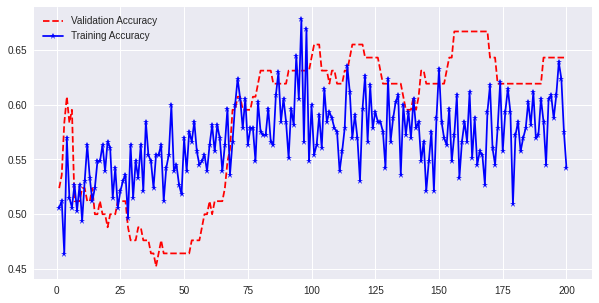

In [12]:
Epochs = 200
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
import keras

model = Sequential()
model.add(Dense(3, activation = 'relu',kernel_initializer='he_uniform' , 
                kernel_regularizer=tf.keras.regularizers.l2(0.04)))


model.add(Dense(4, activation = 'relu',kernel_initializer='he_uniform',
                kernel_regularizer=tf.keras.regularizers.l2(0.04)))
model.add(BatchNormalization())
model.add(Dropout(0.4))



model.add(Dense(2, activation = 'sigmoid' , kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size =60, epochs=Epochs, 
                    validation_data=(X_test, y_test), verbose = True)

#printing the Validation accuracy and validation loss. 
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test Accuracy: ", score[1])

#plotting the validation accuracy and training Accuracy.
fig, ax = plt.subplots(figsize = (10,5))
x = list(range(1, Epochs+1))

va = history.history['val_accuracy'] 
tra = history.history['accuracy']
plt_dynamic(x, va, tra, ax)
plt.show()




# **Performing Dimensionality reduction technique PCA**

In [18]:
# Applying Principal component analysis to Reduce the number of dimensions.
from sklearn.decomposition import PCA

pca_2 = PCA()
pca_2.n_components = 25

data = pca_2.fit_transform(df)
variance = list(pca_2.explained_variance_ratio_.cumsum())
for i in range(len(variance)):
  print('for ',i+1, ' Dimensions', round(variance[i]*100,2),'% of variance is retained')


for  1  Dimensions 20.35 % of variance is retained
for  2  Dimensions 39.24 % of variance is retained
for  3  Dimensions 47.79 % of variance is retained
for  4  Dimensions 53.47 % of variance is retained
for  5  Dimensions 58.48 % of variance is retained
for  6  Dimensions 62.55 % of variance is retained
for  7  Dimensions 65.82 % of variance is retained
for  8  Dimensions 68.87 % of variance is retained
for  9  Dimensions 71.44 % of variance is retained
for  10  Dimensions 73.93 % of variance is retained
for  11  Dimensions 76.0 % of variance is retained
for  12  Dimensions 77.9 % of variance is retained
for  13  Dimensions 79.65 % of variance is retained
for  14  Dimensions 81.19 % of variance is retained
for  15  Dimensions 82.62 % of variance is retained
for  16  Dimensions 83.98 % of variance is retained
for  17  Dimensions 85.21 % of variance is retained
for  18  Dimensions 86.38 % of variance is retained
for  19  Dimensions 87.41 % of variance is retained
for  20  Dimensions 88.

#observations:
1. We observe that 90% of the data is retained when the number of dimensions are 22 hence we choose those number of dimensions and build model on top of it. 

In [31]:
pca_2 = PCA()
pca_2.n_components = 22

data = pca_2.fit_transform(df)

dim = ['dim_'+str(i+1) for i in range(22)]



In [34]:
data.shape

(208, 22)

In [36]:
X = pd.DataFrame(data= data, columns=dim)


,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21,dim_22
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065,-0.616252,0.322501,0.349711,-0.406204,0.588733,-1.513723,1.384272,2.623221,0.008724,0.866819,-1.208238,0.723202
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882,0.321504,-0.567755,0.268648,-0.926965,0.968446,-0.586619,-0.171371,1.403636,0.264560,-0.048882,-2.388110,0.021429
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030,-0.532271,0.309508,-1.932042,-1.441818,1.405234,2.025008,-1.024685,0.826105,0.468705,-1.841670,-1.740823,-2.000942
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318,0.942629,0.024888,-1.451436,0.115763,-0.592267,0.124480,-0.496407,-2.464503,1.878381,-0.999830,-0.685825,1.307367
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594,-1.305728,-1.651747,0.743218,1.247474,-0.776856,1.189454,-0.707854,-0.414109,-0.632443,-0.976459,0.503340,0.258970


(166, 22)	(42, 22)	(166, 2)	(42, 2)
Train on 166 samples, validate on 42 samples
Epoch 1/75
166/166 [==============================] - 0s 963us/step - loss: 54.4246 - accuracy: 0.5271 - val_loss: 53.8796 - val_accuracy: 0.5119
Epoch 2/75
166/166 [==============================] - 0s 176us/step - loss: 53.6221 - accuracy: 0.4880 - val_loss: 53.0107 - val_accuracy: 0.5119
Epoch 3/75
166/166 [==============================] - 0s 163us/step - loss: 52.7374 - accuracy: 0.5151 - val_loss: 52.1256 - val_accuracy: 0.5119
Epoch 4/75
166/166 [==============================] - 0s 166us/step - loss: 51.8562 - accuracy: 0.5693 - val_loss: 51.2404 - val_accuracy: 0.5357
Epoch 5/75
166/166 [==============================] - 0s 152us/step - loss: 50.9682 - accuracy: 0.5602 - val_loss: 50.3625 - val_accuracy: 0.5476
Epoch 6/75
166/166 [==============================] - 0s 146us/step - loss: 50.0947 - accuracy: 0.5813 - val_loss: 49.4952 - val_accuracy: 0.5952
Epoch 7/75
166/166 [=======================

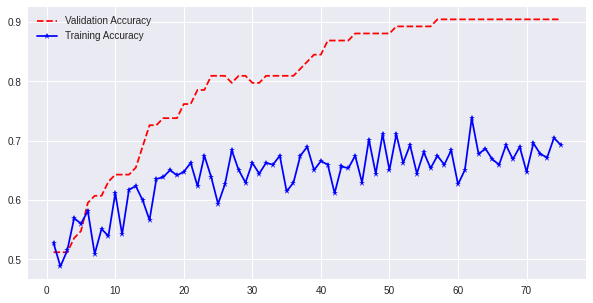

In [53]:
#splitting the dataset into training and testing Dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep = '\t')

#conversion of the Data into numpy array. 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Epochs = 75
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
import keras

model = Sequential()
model.add(Dense(22, activation = 'relu',kernel_initializer='he_uniform' , 
                kernel_regularizer=tf.keras.regularizers.l2(0.4)))



model.add(Dense(44, activation = 'relu',kernel_initializer='he_uniform',
                kernel_regularizer=tf.keras.regularizers.l2(0.4)))

model.add(Dropout(0.4))




model.add(Dense(2, activation = 'sigmoid' , kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size =60, epochs=Epochs, 
                    validation_data=(X_test, y_test), verbose = True)

#printing the Validation accuracy and validation loss. 
score = model.evaluate(X_test, y_test)
print("Test loss: ", score[0])
print("Test Accuracy: ", score[1])

#plotting the validation accuracy and training Accuracy.
fig, ax = plt.subplots(figsize = (10,5))
x = list(range(1, Epochs+1))

va = history.history['val_accuracy'] 
tra = history.history['accuracy']
plt_dynamic(x, va, tra, ax)
plt.show()




# **Observations:**
1. With the PCA dimensionality reduction technique we obtained high accuracy than the Tsne. 
2. The accuracy obtained is 90.48.
3. the model is not overfitting which is obeserved from the above plotting.  